# Импорты

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

# Делим датасет на тестовую выборку и обучающую (x - изображение, y - класс изображения)

In [23]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перечислим классы изображений

In [24]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Изображение с интенсивностью пикселей

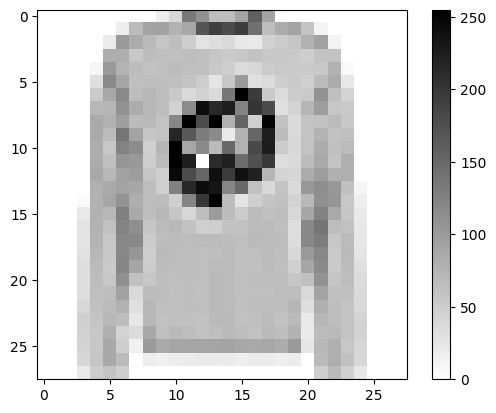

In [25]:
plt.figure()
plt.imshow(x_train[123], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

# Нормализация

In [26]:
x_train = x_train/255
x_test = x_test/255

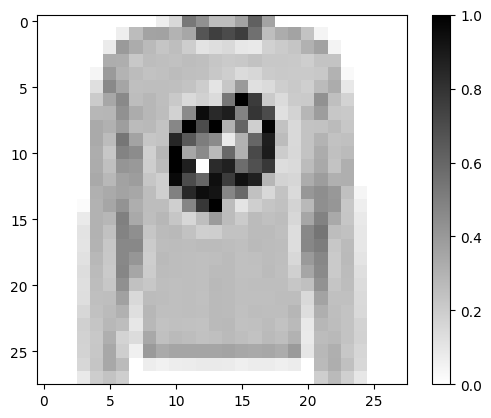

In [27]:
plt.figure()
plt.imshow(x_train[123], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

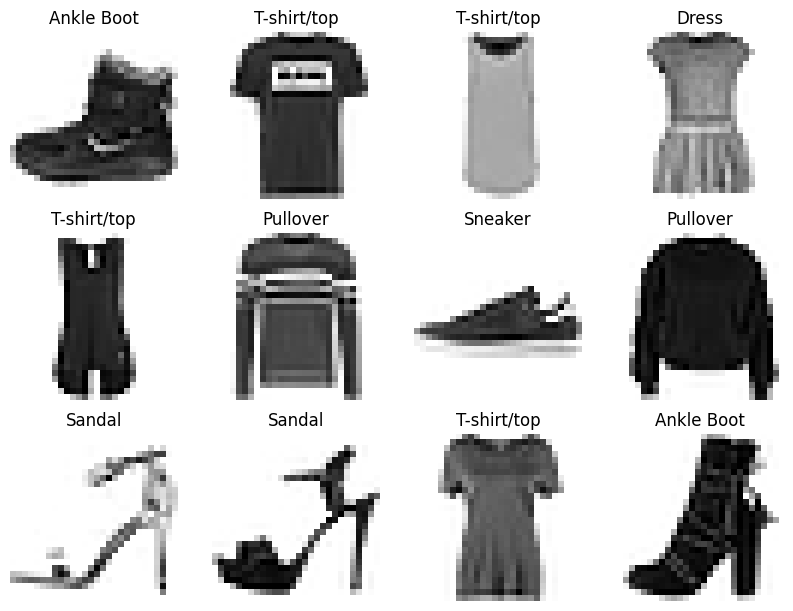

In [38]:
plt.figure(figsize = (10,10))
for i in range(12):
  plt.subplot(4,4,i+1);
  plt.imshow(x_train[i],  cmap=plt.cm.binary)
  plt.axis('off')
  plt.title(class_labels[y_train[i]])

# Строим модель с последотельными слоями
Первый слой - преобразует изображение (двумерный массив) в одномерный

Второй слой - входной со 128 нейронам

Третий слой - выходной 10 нейронов по количеству классов изображений

In [39]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# Компилируем

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Параметры модели

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Обучение с учителем, поэтому передает изображения и ответы
Обучаем с 10 эпохами

In [43]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4998 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3728 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2683 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2502 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [45]:
lest_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)
print('test loss: ', lest_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8843
test accuracy:  0.8842999935150146
test loss:  0.33877113461494446


# Предсказываем на обучающейся выборке

In [58]:
predict = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


# Сверяем результаты

In [55]:
np.argmax(predict[123])

2

In [54]:
y_train[123]

2

Text(0.5, 1.0, 'Pullover')

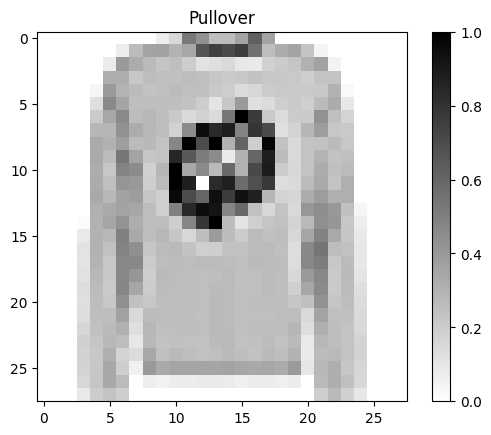

In [57]:
plt.figure()
plt.imshow(x_train[123], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.title(class_labels[y_train[123]])